# Applying the CRISP-DM Method to a Business Problem

CRISP-DM stands for cross-industry process for data mining. It provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

This model is an idealised sequence of events. In practice many of the tasks can be performed in a different order and it will often be necessary to backtrack to previous tasks and repeat certain actions.

# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>
El objetivo principal es reducir la deserción universitaria mediante la detección temprana de estudiantes con bajo rendimiento académico, facilitando la intervención con tutorías y apoyo oportuno.

## 1.1 Assess the Current Situation<a class="anchor" id="Assessthecurrentsituation"></a>

This involves more detailed fact-finding about all of the resources, constraints, assumptions and other factors that you'll need to consider when determining your data analysis goal and project plan.


### 1.1.1. Inventory of resources <a class="anchor" id="Inventory"></a>
List the resources available to the project including:
- **Personnel:** Equipo de 5 integrantes del curso de Inteligencia Artificial.
- **Data:** Dataset de Kaggle sobre factores de rendimiento académico estudiantil.
- **Computing resources:** Google Colab, PCs personales con Python.
- **Software:** Librerías de Python (Pandas, NumPy, Scikit-learn, Matplotlib).


### 1.1.2. Requirements, assumptions and constraints - <a class="anchor" id="Requirements"></a>
- **Requirements:** Entrega del modelo funcional antes de finalizar el curso. El modelo debe ser comprensible y fácil de actualizar.
- **Data security:** No se manejan datos sensibles, solo datasets públicos.
- **Assumptions:** Se asume que los factores del dataset son aplicables al contexto universitario local.
- **Constraints:** Limitación en la disponibilidad de datos reales de la universidad y recursos computacionales básicos.


### 1.1.3.Risks and contingencies <a class="anchor" id="Risks"></a>
- **Risks:** Dataset no representativo del contexto real; baja precisión del modelo.
- **Contingencies:** Ajuste del modelo con datos adicionales y validación continua; enfoque en recomendaciones generales si la precisión es baja.

### 1.1.4.Terminology <a class="anchor" id="Terminology"></a>
- **Tutoría académica:** Apoyo personalizado brindado a estudiantes para mejorar su rendimiento.
- **Deserción estudiantil:** Abandono de la carrera o universidad antes de finalizar los estudios.
- **Factores externos:** Variables no académicas que influyen en el rendimiento (motivación, distancia, acceso a recursos).
- **Modelo predictivo:** Algoritmo de machine learning que anticipa un resultado basado en datos históricos.


### 1.1.5.Costs and benefits  <a class="anchor" id="CostBenefit"></a>
- **Costos:** Uso de tiempo del equipo, recursos computacionales gratuitos (Google Colab), búsqueda y limpieza de datos.
- **Beneficios:**
   - Reducción de la deserción estudiantil.
   - Mejora del rendimiento académico.
   - Herramienta de apoyo para tutores y autoridades educativas.
   - Posible aplicación futura en la universidad con datos reales.

 ## 1.2 What are the desired outputs of the project? <a class="anchor" id="Desiredoutputs"></a>

- **Criterios de éxito del negocio:**
   - Identificación temprana de estudiantes con riesgo de bajo rendimiento.
   - Disminución del índice de deserción mediante intervenciones oportunas.

- **Criterios de éxito en minería de datos:**
   - Modelo predictivo con precisión aceptable (>70%).
   - Fácil actualización del modelo con nuevos datos.

*Plan del proyecto:* Desarrollo del modelo en Python, validación con el dataset, entrega del informe final y presentación en clase.


 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

- ¿Qué factores externos influyen más en el bajo rendimiento académico?
- ¿Qué estudiantes tienen mayor probabilidad de necesitar tutoría?
- ¿Existe relación entre la distancia al centro de estudios, el acceso a recursos y el rendimiento?

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>
The second stage of the CRISP-DM process requires you to acquire the data listed in the project resources. This initial collection includes data loading, if this is necessary for data understanding. For example, if you use a specific tool for data understanding, it makes perfect sense to load your data into this tool. If you acquire multiple data sources then you need to consider how and when you're going to integrate these.

## 2.1 Initial Data Report <a class="anchor" id="Datareport"></a>
Initial data collection report -
List the data sources acquired together with their locations, the methods used to acquire them and any problems encountered. Record problems you encountered and any resolutions achieved. This will help both with future replication of this project and with the execution of similar future projects.

In [ ]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
#Data source:
#https://drive.google.com/file/d/1QosJUyXisfE4fGH5CWtm5OgAj6QcGvUt/view?usp=sharing
file_id = '1QosJUyXisfE4fGH5CWtm5OgAj6QcGvUt'
url = f'https://drive.google.com/uc?id={file_id}'

# Leer el archivo CSV directamente
df = pd.read_csv(url)

# Ver las primeras filas
df.describe()



Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>
Data description report - Describe the data that has been acquired including its format, its quantity (for example, the number of records and fields in each table), the identities of the fields and any other surface features which have been discovered. Evaluate whether the data acquired satisfies your requirements.

In [ ]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:
df.shape

(6607, 20)

In [ ]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        object
Exam_Score                     int64
dtype: object

In [ ]:
df.describe()

Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6607.000000        6607.000000  6607.000000  
mean            1.493719           2.967610    67.235659  
std             1.230570           1.031231     3.890456  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000000           3.000000    67.000000  
75%             2.000000           4.000000    69.000000  
max             8.000000           6.000000   101.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [ ]:
df.head(5)

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>

Examine the quality of the data, addressing questions such as:

- Is the data complete (does it cover all the cases required)?
- Is it correct, or does it contain errors and, if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur, and how common are they?

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem

In [ ]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [ ]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df)

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.


Missing Values  % of Total Values
Parental_Education_Level              90                1.4
Teacher_Quality                       78                1.2
Distance_from_Home                    67                1.0

In [ ]:
# Get the columns with > 50% missing
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 20 columns.
There are 3 columns that have missing values.
We will remove 0 columns.


In [ ]:
# Drop the columns
df = df.drop(list(missing_columns))

### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>
At this point, we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values. For this project, we will remove anomalies based on the definition of extreme outliers:

https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm

- Below the first quartile − 3 ∗ interquartile range
- Above the third quartile + 3 ∗ interquartile range

In [ ]:
def detectar_outliers_extremos(df, columnas_numericas):
    outliers = {}
    total_outliers_global = 0
    outlier_indices = set()

    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 3 * IQR
        limite_superior = Q3 + 3 * IQR

        # Filtrar outliers
        outlier_mask = (df[col] < limite_inferior) | (df[col] > limite_superior)
        total_outliers = outlier_mask.sum()

        # Guardar los índices de los outliers (sin duplicados)
        outlier_indices.update(df[outlier_mask].index)

        outliers[col] = {
            'Total Outliers': total_outliers,
            'Porcentaje': round(100 * total_outliers / len(df), 2),
            'Límite inferior': limite_inferior,
            'Límite superior': limite_superior
        }

    # Calcular total global sin repetir filas
    total_outliers_global = len(outlier_indices)
    porcentaje_global = round(100 * total_outliers_global / len(df), 2)

    # Mostrar resultados
    print(f"\n📊 Total general de outliers detectados (filas únicas): {total_outliers_global}")
    print(f"📈 Representan el {porcentaje_global}% del total de registros ({len(df)})")

    return pd.DataFrame(outliers).T

# Columnas numéricas
columnas_numericas = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'
]

# Ejecutar análisis
outliers_df = detectar_outliers_extremos(df, columnas_numericas)
outliers_df



📊 Total general de outliers detectados (filas únicas): 69
📈 Representan el 1.04% del total de registros (6607)


Total Outliers  Porcentaje  Límite inferior  \
Hours_Studied                 0.0        0.00             -8.0   
Attendance                    0.0        0.00             10.0   
Sleep_Hours                   0.0        0.00              0.0   
Previous_Scores               0.0        0.00            -12.0   
Tutoring_Sessions            26.0        0.39             -2.0   
Physical_Activity             0.0        0.00             -4.0   
Exam_Score                   43.0        0.65             53.0   

                   Límite superior  
Hours_Studied                 48.0  
Attendance                   150.0  
Sleep_Hours                   14.0  
Previous_Scores              163.0  
Tutoring_Sessions              5.0  
Physical_Activity             10.0  
Exam_Score                    81.0

## 2.4 Initial Data Exploration  <a class="anchor" id="Exploredata"></a>
During this stage you'll address data mining questions using querying, data visualization and reporting techniques. These may include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyses may directly address your data mining goals. They may also contribute to or refine the data description and quality reports, and feed into the transformation and other data preparation steps needed for further analysis.

- **Data exploration report** - Describe results of your data exploration, including first findings or initial hypothesis and their impact on the remainder of the project. If appropriate you could include graphs and plots here to indicate data characteristics that suggest further examination of interesting data subsets.

### 2.4.1 Distributions  <a class="anchor" id="Distributions"></a>

In [ ]:
def count_values_table(df):
        count_val = df.value_counts()
        count_val_percent = 100 * df.value_counts() / len(df)
        count_val_table = pd.concat([count_val, count_val_percent.round(1)], axis=1)
        count_val_table_ren_columns = count_val_table.rename(
        columns = {0 : 'Count Values', 1 : '% of Total Values'})
        return count_val_table_ren_columns

In [ ]:
# Histogram
def hist_chart(df, col):
        plt.style.use('fivethirtyeight')
        plt.hist(df[col].dropna(), edgecolor = 'k');
        plt.xlabel(col); plt.ylabel('Number of Entries');
        plt.title('Distribution of '+col);

count  count
Access_to_Resources              
Medium                3319   50.2
High                  1975   29.9
Low                   1313   19.9

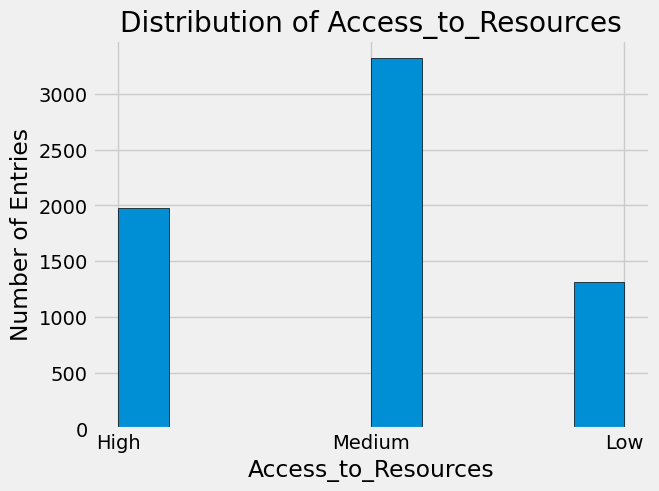

In [ ]:
# Histogram & Results
hist_chart(df, 'Access_to_Resources')
count_values_table(df.Access_to_Resources)

### 2.4.2 Correlations  <a class="anchor" id="Correlations"></a>
Can we derive any correlation from this data-set. Pairplot chart gives us correlations, distributions and regression path
Correlogram are awesome for exploratory analysis. It allows to quickly observe the relationship between every variable of your matrix.
It is easy to do it with seaborn: just call the pairplot function

Pairplot Documentation cab be found here: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [ ]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied           1.000000   -0.009908     0.010977         0.024846   
Attendance             -0.009908    1.000000    -0.015918        -0.020186   
Sleep_Hours             0.010977   -0.015918     1.000000        -0.021750   
Previous_Scores         0.024846   -0.020186    -0.021750         1.000000   
Tutoring_Sessions      -0.014282    0.014324    -0.012216        -0.013122   
Physical_Activity       0.004624   -0.022435    -0.000378        -0.011274   
Exam_Score              0.445455    0.581072    -0.017022         0.175079   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied              -0.014282           0.004624    0.445455  
Attendance                  0.014324          -0.022435    0.581072  
Sleep_Hours                -0.012216          -0.000378   -0.017022  
Previous_Scores            -0.013122          -0.011274    0.175079  
Tutoring_Sessions        

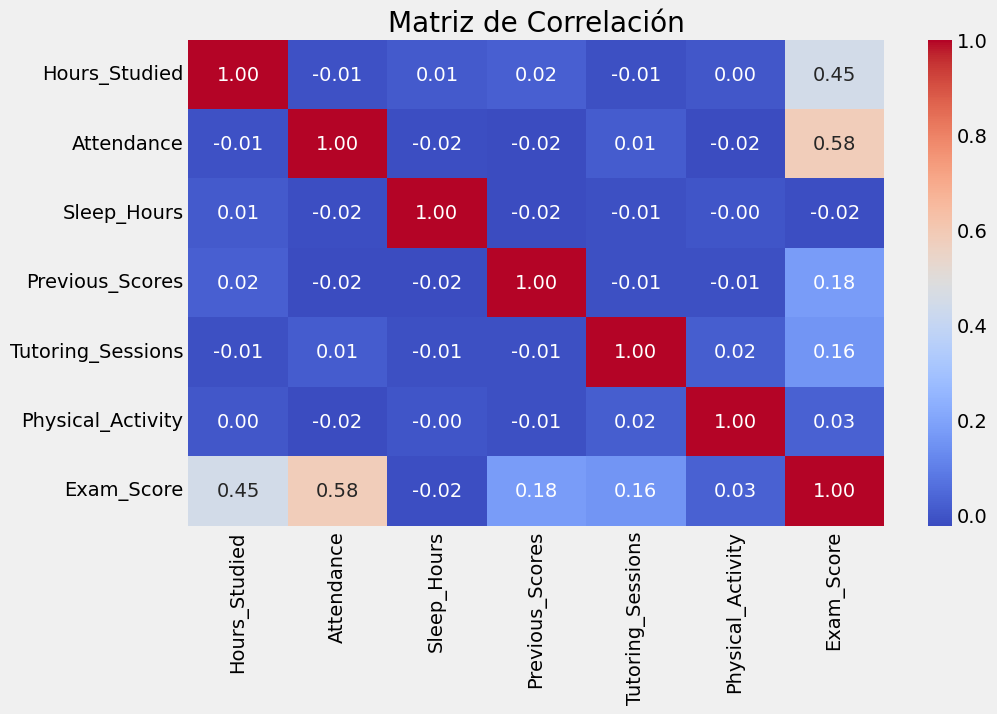

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()


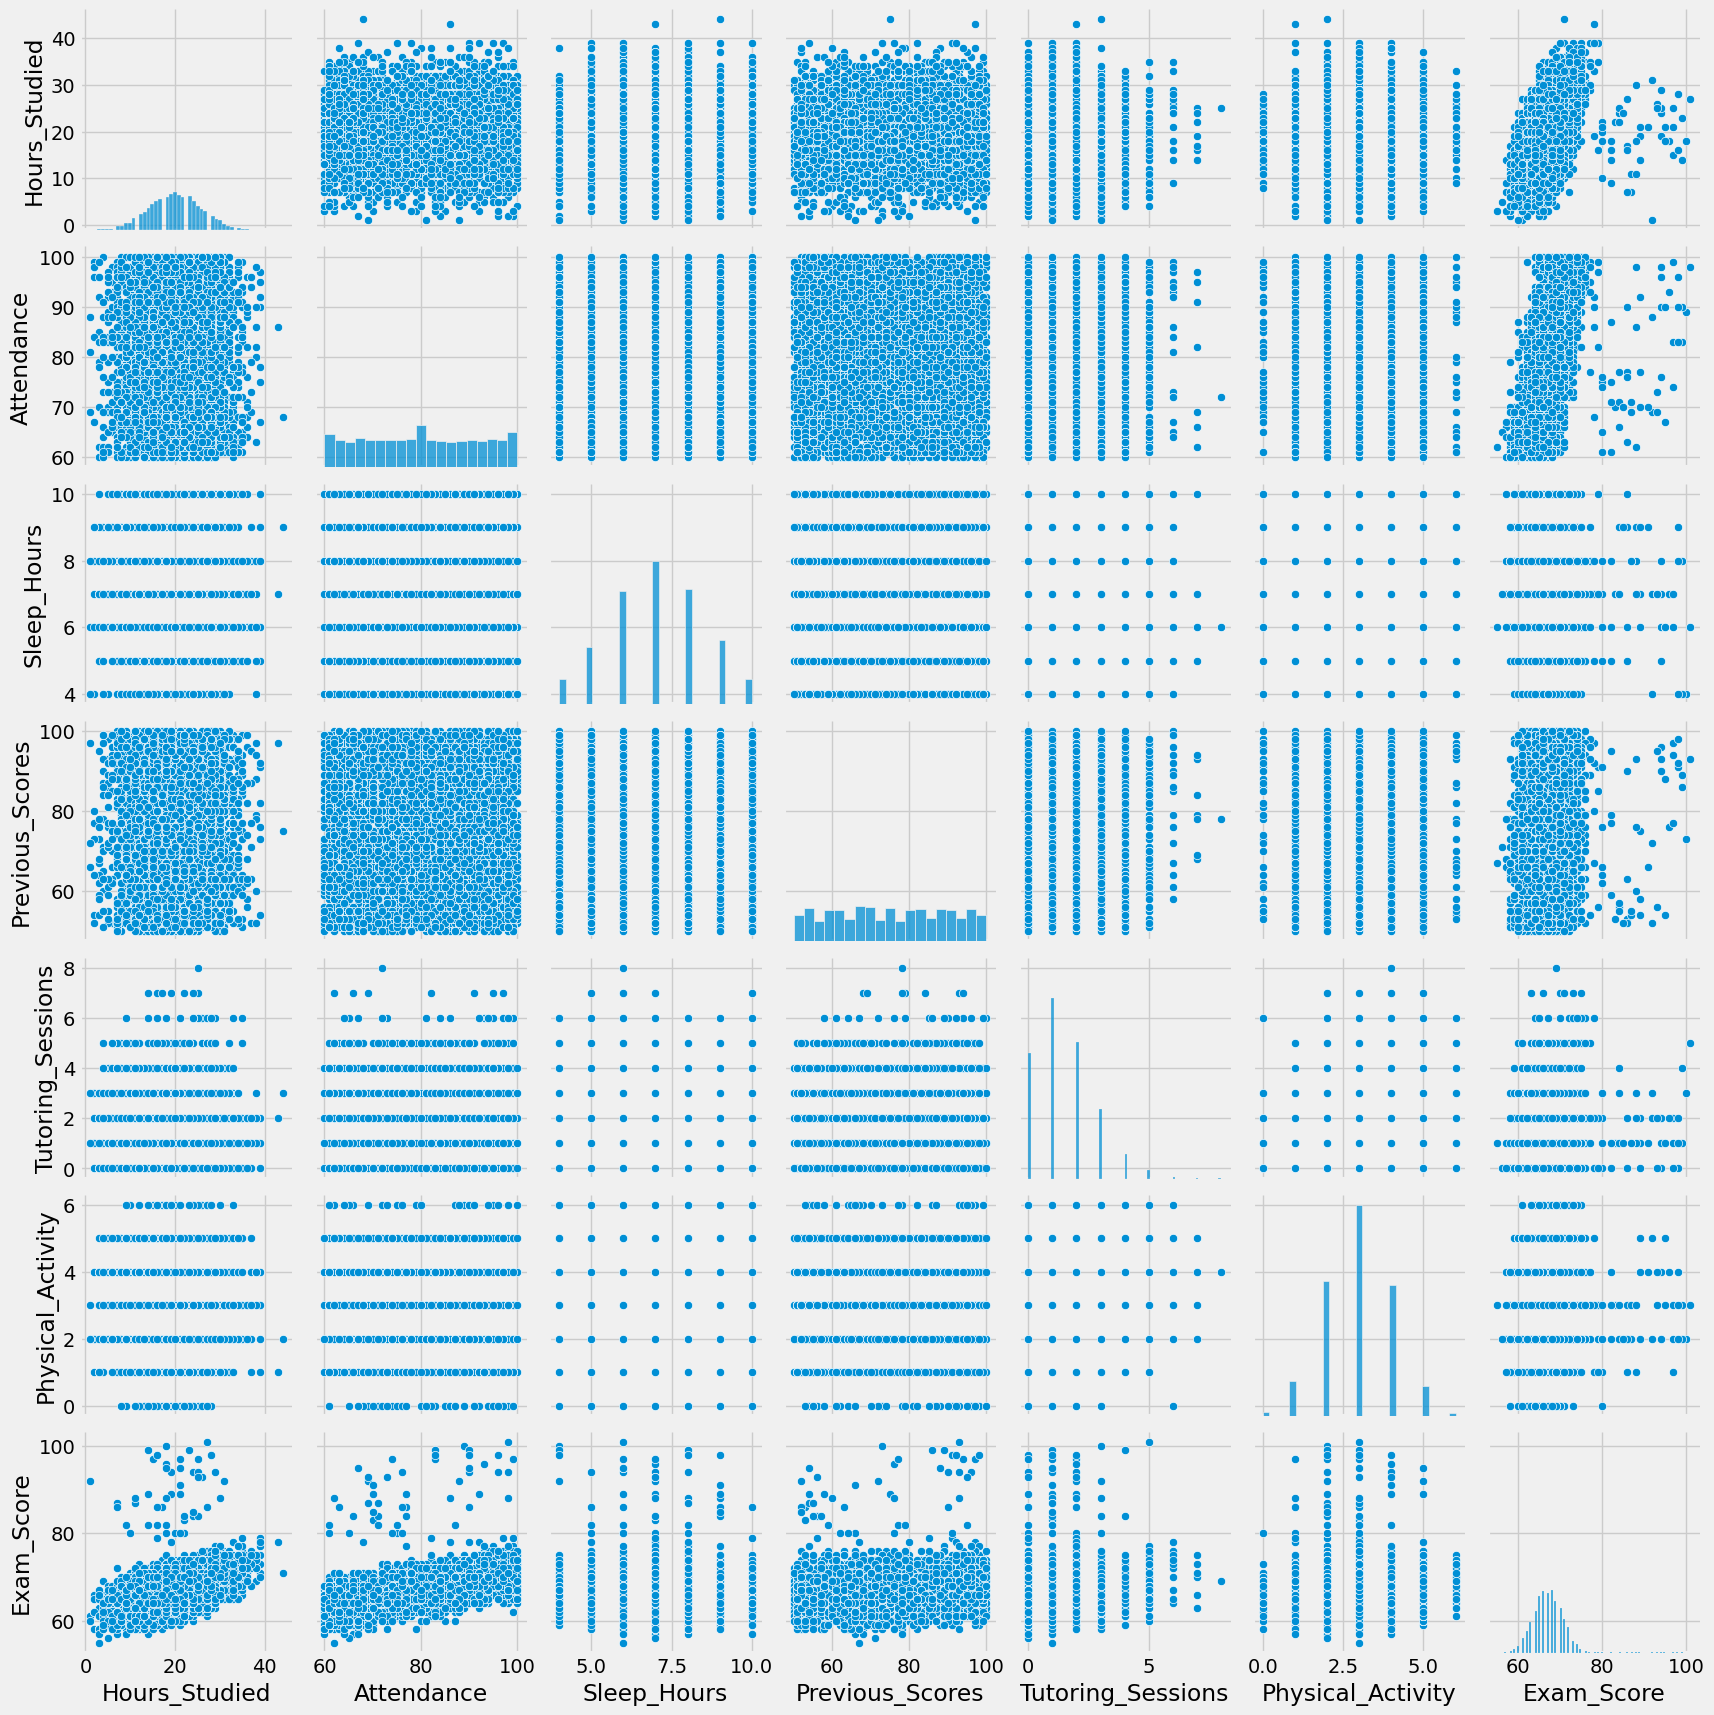

In [ ]:

sns.pairplot(df)
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## 2.5 Data Quality Report <a class="anchor" id="Dataqualityreport"></a>
List the results of the data quality verification. If quality problems exist, suggest possible solutions. Solutions to data quality problems generally depend heavily on both data and business knowledge.

In [ ]:
def data_quality_report(df, df_name):
    print(f"\nData Quality Report for {df_name}")

    # 1. Valores faltantes
    print("\n1. Valores faltantes por columna:")
    missing_values = df.isnull().sum()
    print(missing_values[missing_values > 0])  # Muestra solo las columnas con valores faltantes

    total_missing_values = missing_values.sum()
    print(f"\nTotal de valores faltantes: {total_missing_values}")

    # 2. Valores duplicados
    duplicated_rows = df.duplicated().sum()
    print(f"\n2. Total de filas duplicadas: {duplicated_rows}")

    # 3. Tipos de datos
    print(f"\n3. Tipos de datos por columna:\n{df.dtypes}")

    # 4. Estadísticas básicas
    print("\n4. Estadísticas básicas:")
    print(df.describe(include='all'))  # Incluye todas las columnas, incluso las no numéricas

    # 5. Valores únicos por columna
    print("\n5. Valores únicos por columna:")
    for col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos")

In [ ]:
data_quality_report(df, "Resumen de la calidad de los datos")


Data Quality Report for Resumen de la calidad de los datos

1. Valores faltantes por columna:
Teacher_Quality             78
Parental_Education_Level    90
Distance_from_Home          67
dtype: int64

Total de valores faltantes: 235

2. Total de filas duplicadas: 0

3. Tipos de datos por columna:
Hours_Studied                  int64
Attendance                     int64
Parental_Involvement          object
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Internet_Access               object
Tutoring_Sessions              int64
Family_Income                 object
Teacher_Quality               object
School_Type                   object
Peer_Influence                object
Physical_Activity              int64
Learning_Disabilities         object
Parental_Education_Level      object
Distance_from_Home            object
Gender                        objec

#Hallazgos

In [ ]:
df['Distance_from_Home']

0           Near
1       Moderate
2           Near
3       Moderate
4           Near
          ...   
6602        Near
6603        Near
6604        Near
6605         Far
6606        Near
Name: Distance_from_Home, Length: 6607, dtype: object

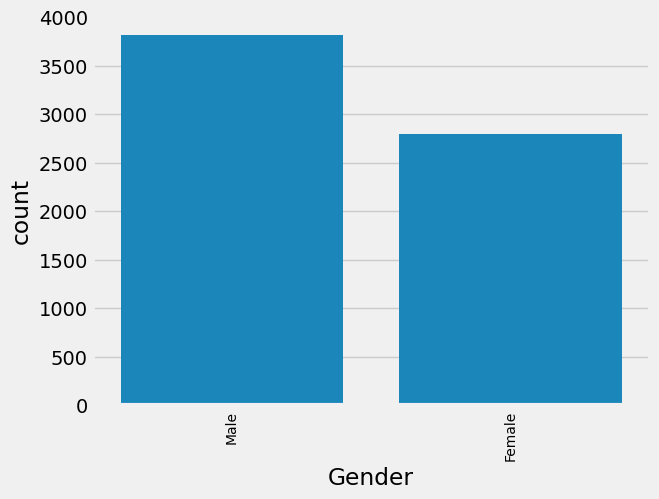

In [ ]:
sns.countplot(data=df, x = 'Gender')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

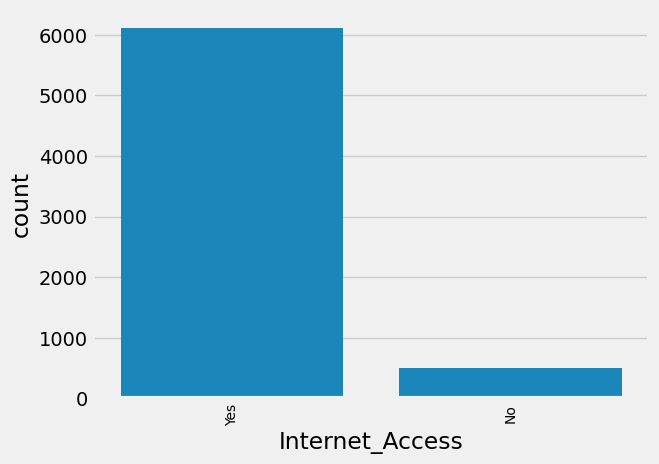

In [ ]:
sns.countplot(data=df, x = 'Internet_Access')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

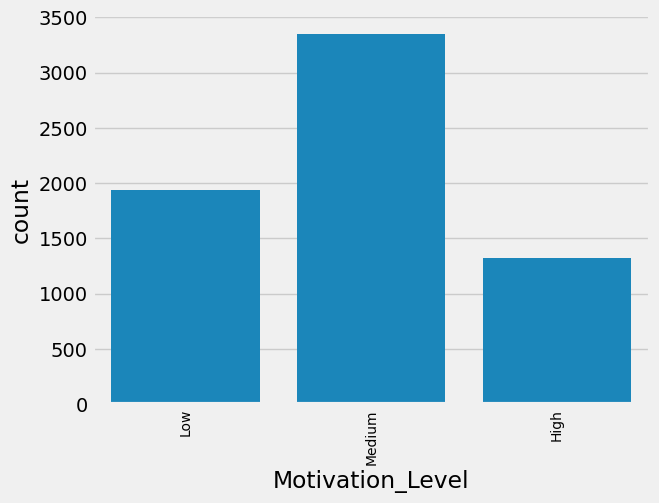

In [ ]:
sns.countplot(data=df, x = 'Motivation_Level')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

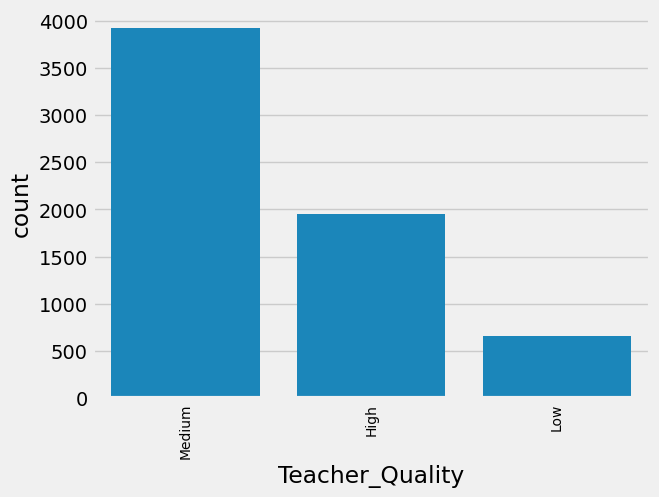

In [ ]:
sns.countplot(data=df, x = 'Teacher_Quality')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

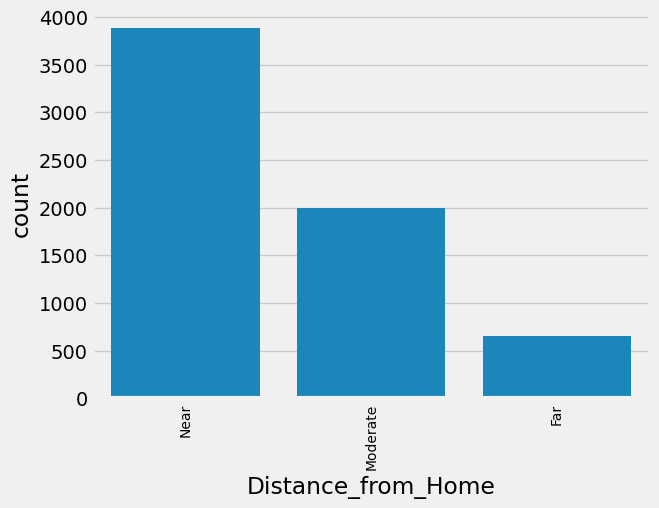

In [ ]:
sns.countplot(data=df, x = 'Distance_from_Home')
plt.xticks(rotation = 90, fontsize=10)
plt.show()

<Axes: title={'center': 'Nota del examen segun motivacion'}, xlabel='Motivation_Level', ylabel='Exam_Score'>

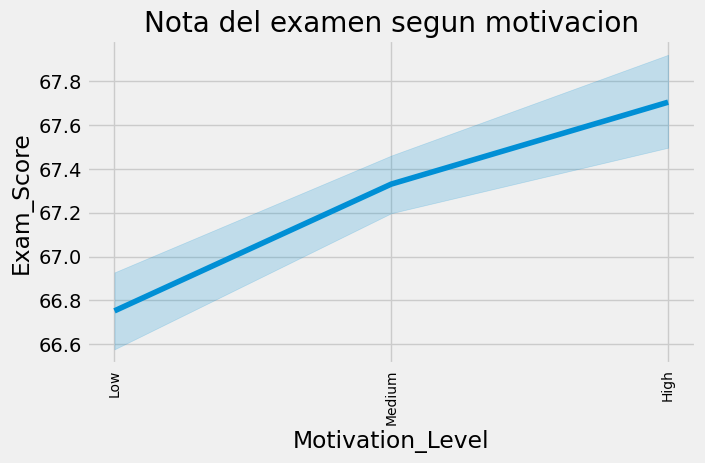

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 90, fontsize=10)
plt.title("Nota del examen segun motivacion")
sns.lineplot(data=df, x = 'Motivation_Level', y = 'Exam_Score')


([<matplotlib.patches.Wedge at 0x7d03f3bcdf50>,
 [Text(-0.6414482298808623, 0.8936129857957015, 'Public'),
  Text(0.6414480949490481, -0.8936130826516794, 'Private')],
 [Text(-0.34988085266228847, 0.48742526497947347, '69.817%'),
  Text(0.3498807790631171, -0.48742531781000686, '30.183%')])

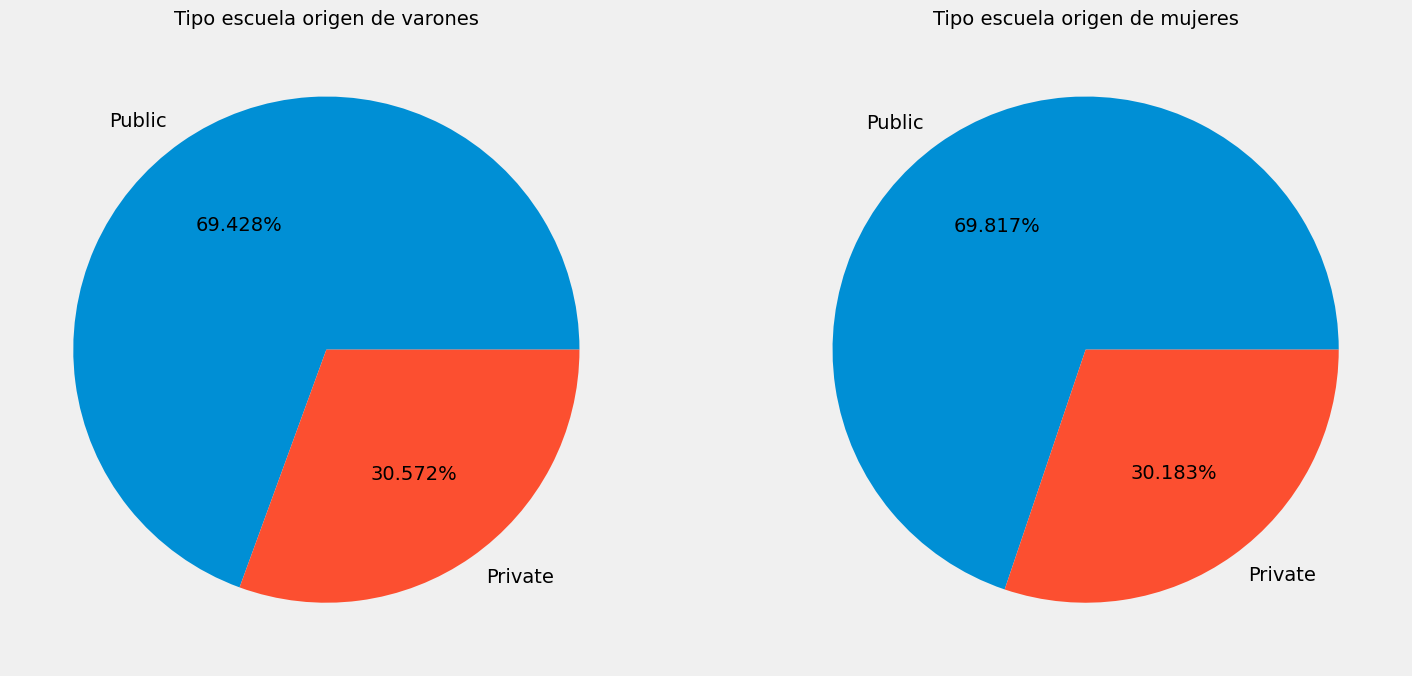

In [ ]:
Ma = pd.DataFrame(df.loc[(df['Gender'] == 'Male') ])
Fe = pd.DataFrame(df.loc[(df['Gender'] == 'Female') ])

#Ajustamos tamaño de la figura:
fig = plt.figure(figsize = (16, 9))


ax = fig.add_subplot(121)
Ma_segment_pie = pd.DataFrame(Ma['School_Type'].value_counts())
ax.set_title('Tipo escuela origen de varones', fontsize = 14)
# rh_segment_pie['market_segment'] does not exist, it is actually in the index
# Use rh_segment_pie['count'] instead to access the values for the pie chart
# and rh_segment_pie.index to access the labels
ax.pie(x = Ma_segment_pie['count'], labels = Ma_segment_pie.index, autopct = '%.3f%%')

#Pie de City Hotel:
ax = fig.add_subplot(122)
Fe_segment_pie = pd.DataFrame(Fe['School_Type'].value_counts())
ax.set_title('Tipo escuela origen de mujeres', fontsize = 14)
# Similarly, use ch_segment_pie['count'] for the values and ch_segment_pie.index for the labels
ax.pie(x = Fe_segment_pie['count'], labels = Fe_segment_pie.index, autopct = '%.3f%%')

([<matplotlib.patches.Wedge at 0x7d03f3c97910>,
 [Text(-0.009279761311002273, 1.099960856589911, 'Medium'),
  Text(-0.6283129365592273, -0.9028969231049138, 'Low'),
  Text(0.8975643849179569, -0.635907363479029, 'High')],
 [Text(-0.005061687987819421, 0.5999786490490423, '50.269%'),
  Text(-0.34271614721412397, -0.49248923078449836, '30.111%'),
  Text(0.4895805735916128, -0.34685856189765213, '19.620%')])

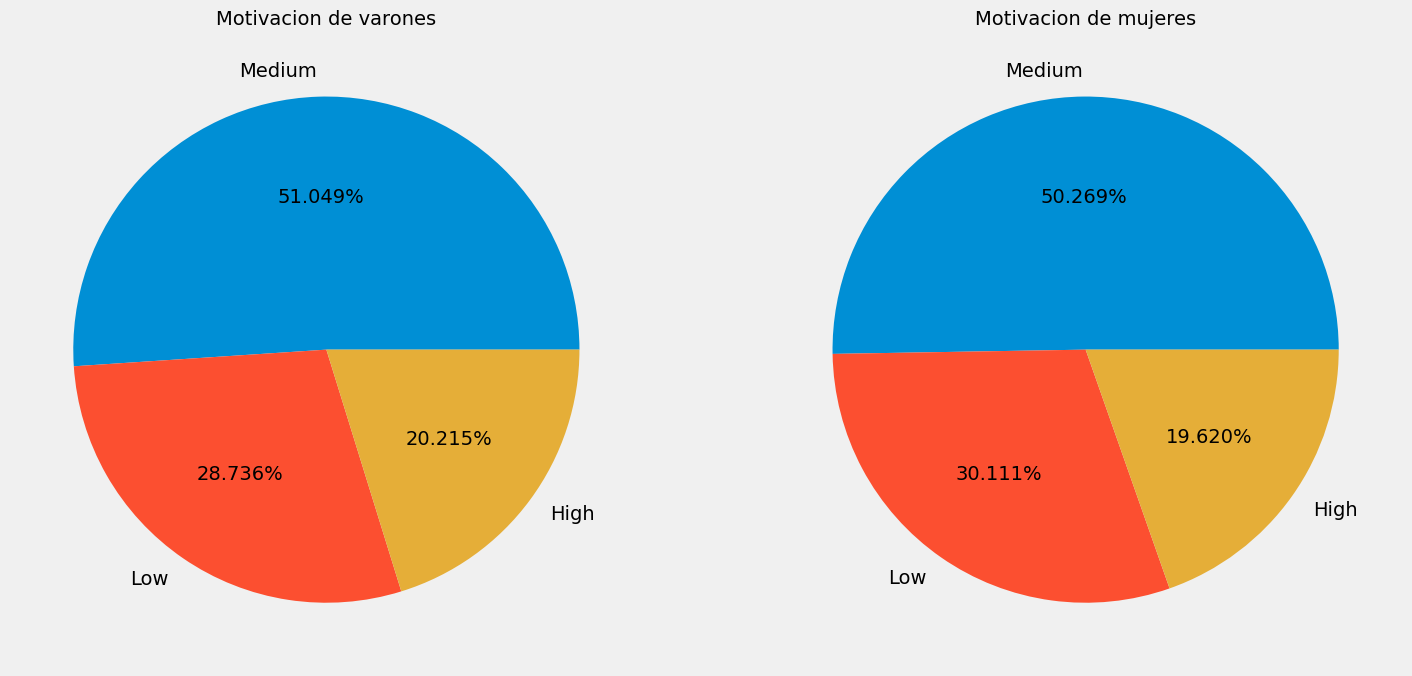

In [ ]:
Ma = pd.DataFrame(df.loc[(df['Gender'] == 'Male') ])
Fe = pd.DataFrame(df.loc[(df['Gender'] == 'Female') ])

#Ajustamos tamaño de la figura:
fig = plt.figure(figsize = (16, 9))


ax = fig.add_subplot(121)
Ma_segment_pie = pd.DataFrame(Ma['Motivation_Level'].value_counts())
ax.set_title('Motivacion de varones', fontsize = 14)
# rh_segment_pie['market_segment'] does not exist, it is actually in the index
# Use rh_segment_pie['count'] instead to access the values for the pie chart
# and rh_segment_pie.index to access the labels
ax.pie(x = Ma_segment_pie['count'], labels = Ma_segment_pie.index, autopct = '%.3f%%')

#Pie de City Hotel:
ax = fig.add_subplot(122)
Fe_segment_pie = pd.DataFrame(Fe['Motivation_Level'].value_counts())
ax.set_title('Motivacion de mujeres', fontsize = 14)
# Similarly, use ch_segment_pie['count'] for the values and ch_segment_pie.index for the labels
ax.pie(x = Fe_segment_pie['count'], labels = Fe_segment_pie.index, autopct = '%.3f%%')

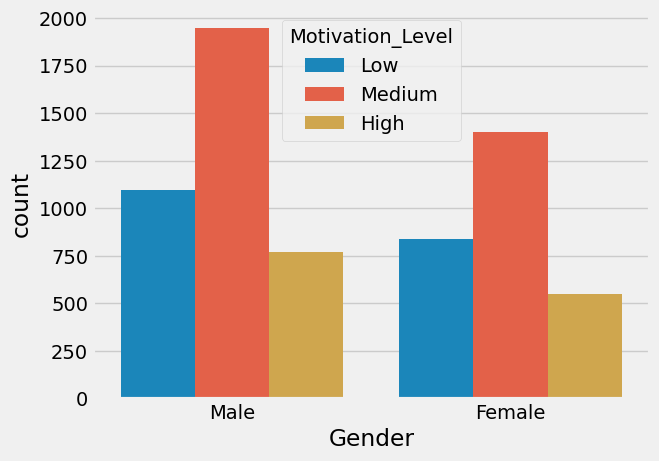

In [ ]:
sns.countplot(data=df, x = 'Gender', hue='Motivation_Level')
plt.show()

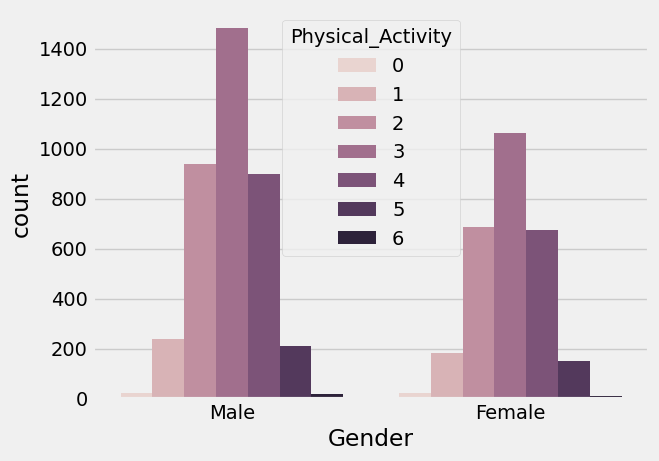

In [ ]:
sns.countplot(data=df, x = 'Gender', hue='Physical_Activity')
plt.show()

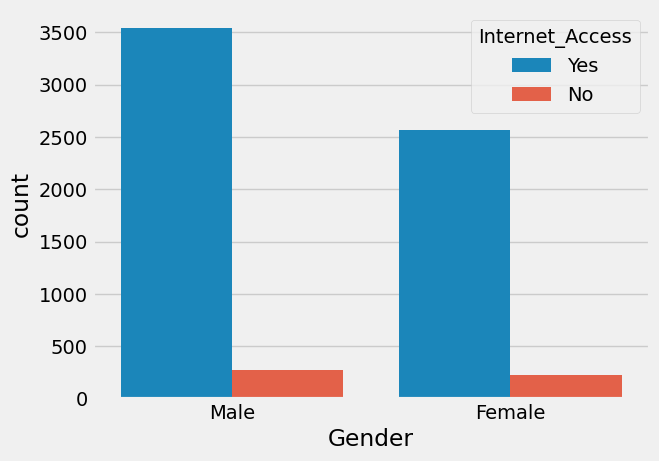

In [ ]:
sns.countplot(data=df, x = 'Gender', hue='Internet_Access')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

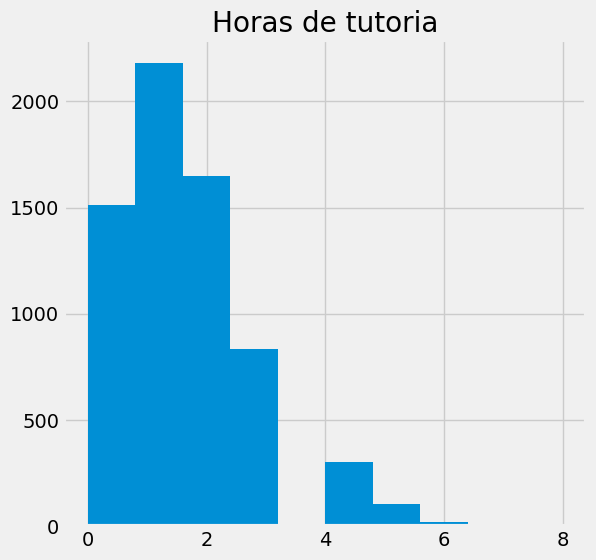

In [ ]:
df['Tutoring_Sessions'].hist(figsize = (6,6))
plt.title("Horas de tutoria")
plt.show

In [ ]:
df['Distance_from_Home'].unique()
df_nonan_aux = df.copy()
df_nonan_aux = df.dropna()
df_nonan_aux['Distance_from_Home'].unique()

array(['Near', 'Moderate', 'Far'], dtype=object)

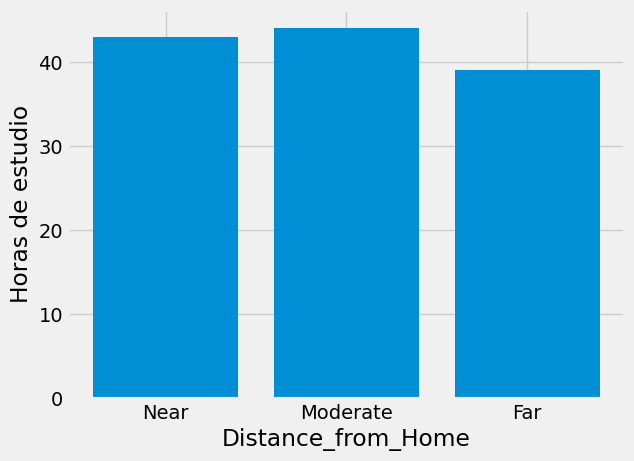

In [ ]:
plt.bar(df_nonan_aux['Distance_from_Home'],df_nonan_aux['Hours_Studied'])
plt.ylabel('Horas de estudio')
plt.xlabel('Distance_from_Home')
plt.show()

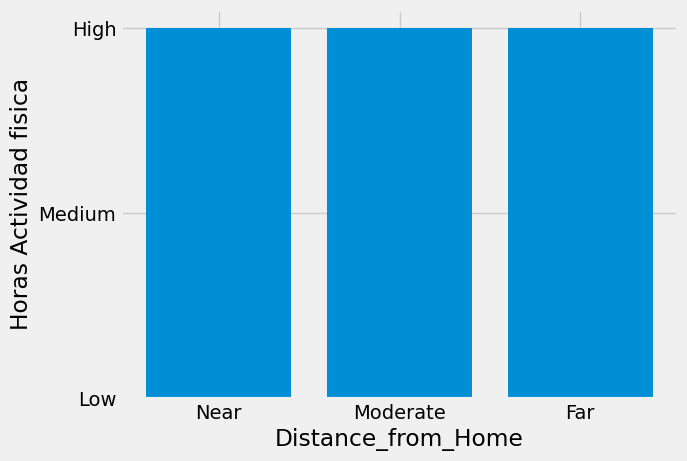

In [ ]:
plt.bar(df_nonan_aux['Distance_from_Home'],df_nonan_aux['Motivation_Level'])
plt.ylabel('Horas Actividad fisica')
plt.xlabel('Distance_from_Home')
plt.show()

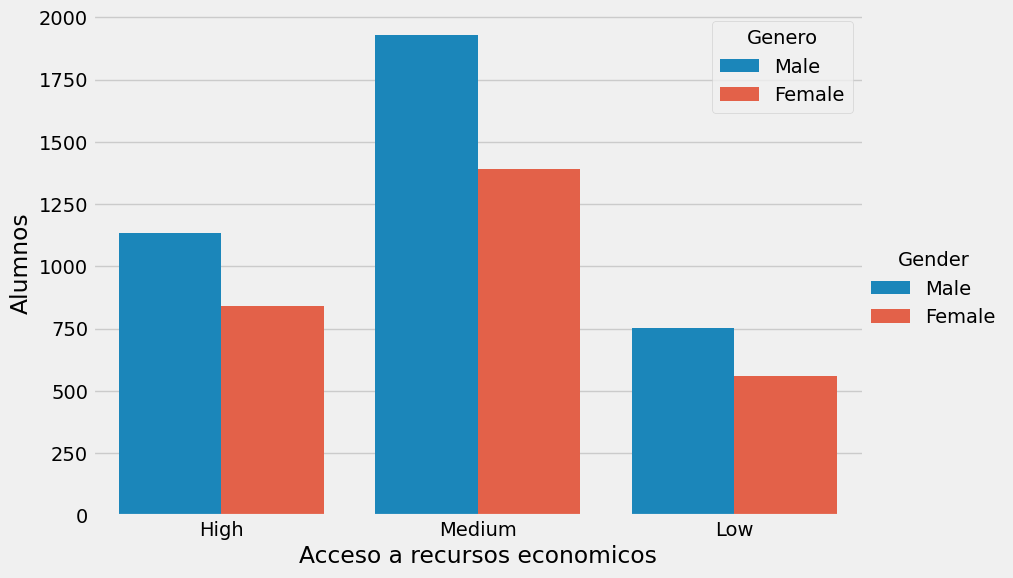

In [ ]:
sns.catplot(x="Access_to_Resources", hue = 'Gender', kind="count", data=df, height = 6, aspect = 1.5)
plt.ylabel('Alumnos')
plt.xlabel('Acceso a recursos economicos')
plt.legend(title='Genero')
plt.show()

<Axes: title={'center': 'Nota del examen segun porcentaje de asistencia'}, xlabel='Attendance', ylabel='Exam_Score'>

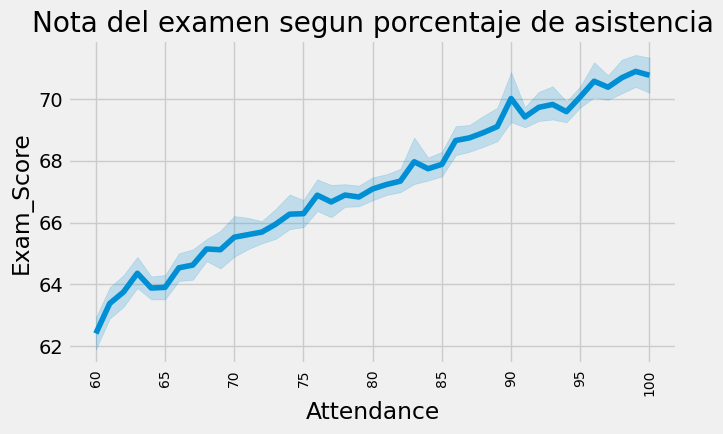

In [ ]:
fig = plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation = 90, fontsize=10)
plt.title("Nota del examen segun porcentaje de asistencia")
sns.lineplot(data=df, x = 'Attendance', y = 'Exam_Score')


<ipython-input-42-6ec6be128d6f>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Parental_Involvement', y='Hours_Studied',estimator='mean',ci=None)


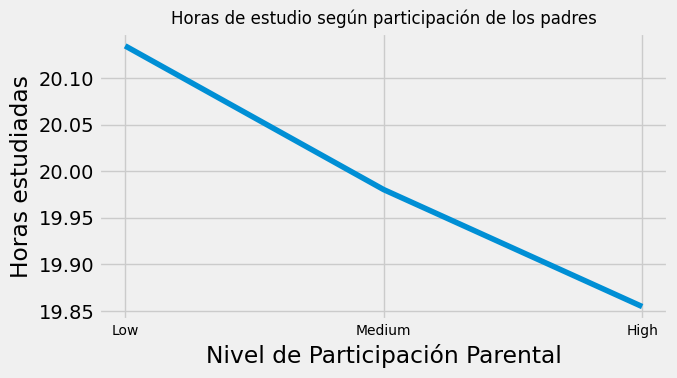

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Horas de estudio según participación de los padres", fontsize=12)
sns.lineplot( data=df, x='Parental_Involvement', y='Hours_Studied',estimator='mean',ci=None)
plt.ylabel('Horas estudiadas')
plt.xlabel('Nivel de Participación Parental')
plt.tight_layout()
plt.show()


<ipython-input-43-549328dbd16a>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Parental_Involvement', y='Exam_Score',estimator='mean',ci=None)


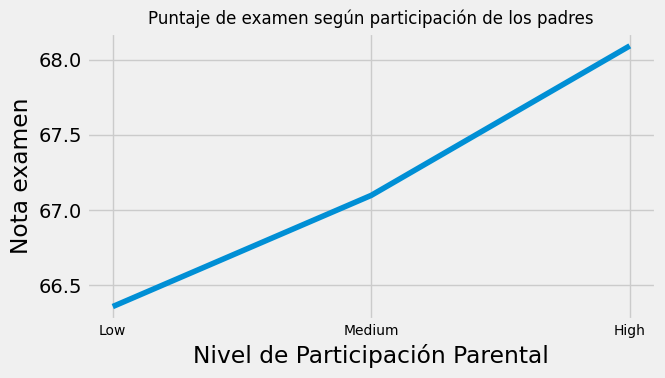

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Puntaje de examen según participación de los padres", fontsize=12)
sns.lineplot( data=df, x='Parental_Involvement', y='Exam_Score',estimator='mean',ci=None)
plt.ylabel('Nota examen')
plt.xlabel('Nivel de Participación Parental')
plt.tight_layout()
plt.show()


<ipython-input-44-47889e467032>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Access_to_Resources', y='Exam_Score', order=['Low', 'Medium', 'High'], ci=None)


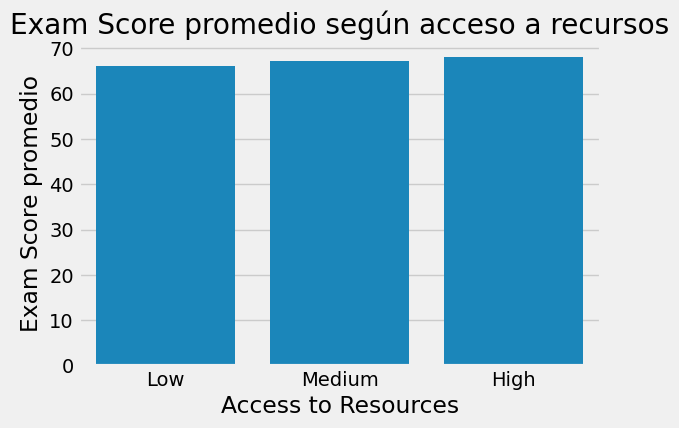

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Access_to_Resources', y='Exam_Score', order=['Low', 'Medium', 'High'], ci=None)
plt.title('Exam Score promedio según acceso a recursos')
plt.ylabel('Exam Score promedio')
plt.xlabel('Access to Resources')
plt.show()


<ipython-input-45-1aeddc66433d>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Extracurricular_Activities', y='Exam_Score',ci=None)


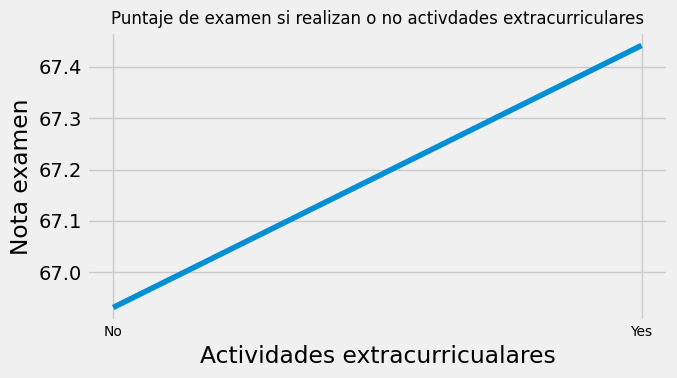

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Puntaje de examen si realizan o no activdades extracurriculares", fontsize=12)
sns.lineplot( data=df, x='Extracurricular_Activities', y='Exam_Score',ci=None)
plt.ylabel('Nota examen')
plt.xlabel('Actividades extracurricualares')
plt.tight_layout()
plt.show()



<ipython-input-46-e33135230cab>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_aux, x='Sleep_Range', y='Hours_Studied', ci=None, order=['<=5', '6', '7', '8', '9', '10+'])


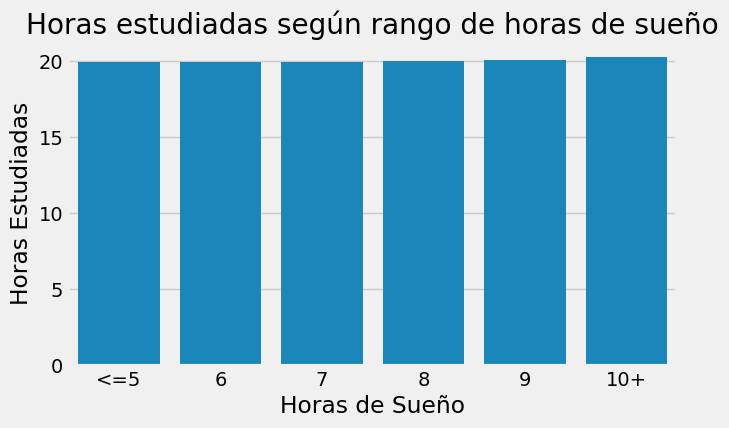

In [ ]:
df_aux=df.copy()
df_aux['Sleep_Range'] = pd.cut(df['Sleep_Hours'], bins=[0, 5, 6, 7, 8, 9, 24], labels=['<=5', '6', '7', '8', '9', '10+'])

plt.figure(figsize=(7,4))
sns.barplot(data=df_aux, x='Sleep_Range', y='Hours_Studied', ci=None, order=['<=5', '6', '7', '8', '9', '10+'])
plt.title('Horas estudiadas según rango de horas de sueño')
plt.xlabel('Horas de Sueño')
plt.ylabel('Horas Estudiadas')
plt.show()


<ipython-input-47-99d8b4292f0a>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Family_Income', y='Exam_Score', ci=None)


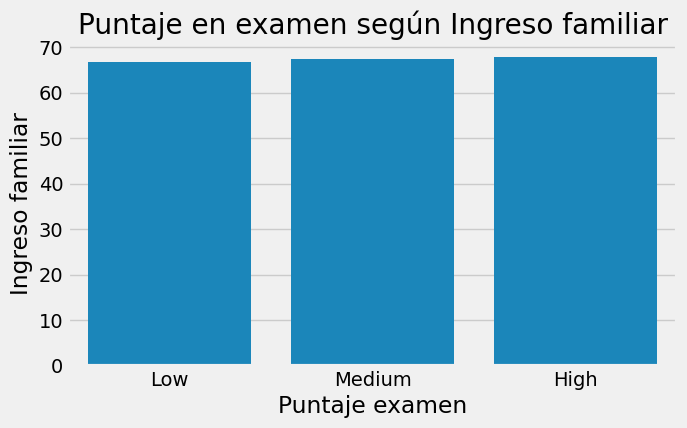

In [ ]:
plt.figure(figsize=(7,4))
sns.barplot(data=df, x='Family_Income', y='Exam_Score', ci=None)
plt.title('Puntaje en examen según Ingreso familiar')
plt.xlabel('Puntaje examen')
plt.ylabel('Ingreso familiar')
plt.show()


<ipython-input-48-6a4e58f453bb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Teacher_Quality', y='Exam_Score',ci=None)


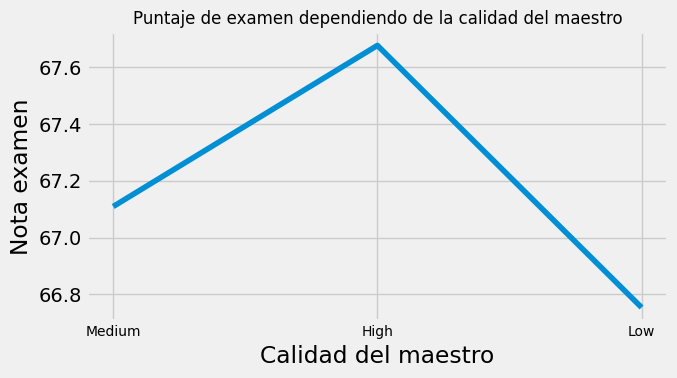

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Puntaje de examen dependiendo de la calidad del maestro", fontsize=12)
sns.lineplot( data=df, x='Teacher_Quality', y='Exam_Score',ci=None)
plt.ylabel('Nota examen')
plt.xlabel('Calidad del maestro')
plt.tight_layout()
plt.show()


<ipython-input-49-3df89d31f3eb>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Learning_Disabilities', y='Exam_Score',ci=None)


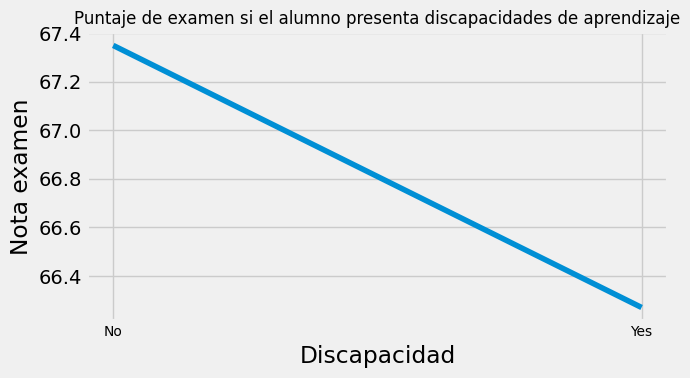

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Puntaje de examen si el alumno presenta discapacidades de aprendizaje", fontsize=12)
sns.lineplot( data=df, x='Learning_Disabilities', y='Exam_Score',ci=None)
plt.ylabel('Nota examen')
plt.xlabel('Discapacidad')
plt.tight_layout()
plt.show()


<ipython-input-50-92bd526dadee>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Learning_Disabilities', y='Hours_Studied',ci=None)


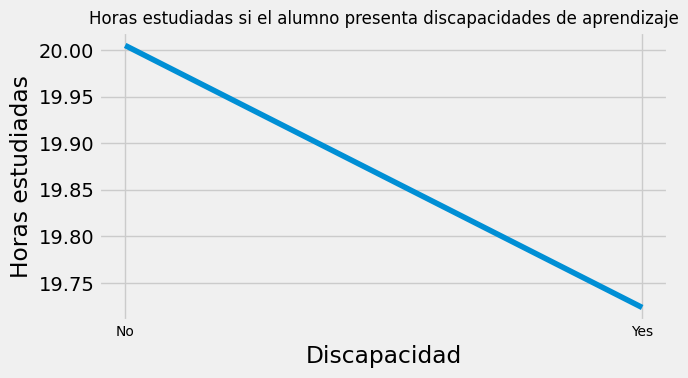

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Horas estudiadas si el alumno presenta discapacidades de aprendizaje", fontsize=12)
sns.lineplot( data=df, x='Learning_Disabilities', y='Hours_Studied',ci=None)
plt.ylabel('Horas estudiadas')
plt.xlabel('Discapacidad')
plt.tight_layout()
plt.show()


<ipython-input-51-f29679482918>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( data=df, x='Parental_Education_Level', y='Exam_Score',ci=None)


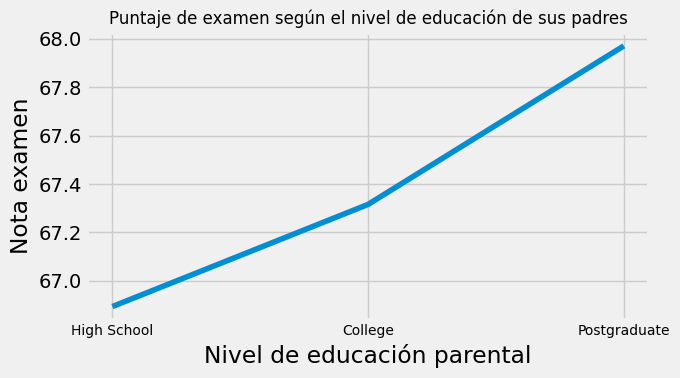

In [ ]:
plt.figure(figsize=(7,4), dpi=100)
plt.xticks(rotation=0, fontsize=10)
plt.title("Puntaje de examen según el nivel de educación de sus padres", fontsize=12)
sns.lineplot( data=df, x='Parental_Education_Level', y='Exam_Score',ci=None)
plt.ylabel('Nota examen')
plt.xlabel('Nivel de educación parental')
plt.tight_layout()
plt.show()


# 3. Stage Three - Data Preperation <a class="anchor" id="Datapreperation"></a>
This is the stage of the project where you decide on the data that you're going to use for analysis. The criteria you might use to make this decision include the relevance of the data to your data mining goals, the quality of the data, and also technical constraints such as limits on data volume or data types. Note that data selection covers selection of attributes (columns) as well as selection of records (rows) in a table.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

## 3.2 Clean The Data <a class="anchor" id="Cleansethedata"></a>
This task involves raise the data quality to the level required by the analysis techniques that you've selected. This may involve selecting clean subsets of the data, the insertion of suitable defaults, or more ambitious techniques such as the estimation of missing data by modelling.

### 3.2.1 Label Encoding <a class="anchor" id="labelEncoding"></a>
Label Encoding to turn Categorical values to Integers

An approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number. For example, the body_style column contains 5 different values. We could choose to encode it like this:

convertible -> 0
hardtop -> 1
hatchback -> 2
sedan -> 3
wagon -> 4
http://pbpython.com/categorical-encoding.html

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categ = ['Parental_Involvement', 'Access_to_Resources','Extracurricular_Activities','Motivation_Level','Internet_Access','Family_Income','Teacher_Quality','School_Type','Learning_Disabilities','Parental_Education_Level','Distance_from_Home']
for col in categ:
    print(f"{col}: {df[col].unique()}\n")

Parental_Involvement: ['Low' 'Medium' 'High']

Access_to_Resources: ['High' 'Medium' 'Low']

Extracurricular_Activities: ['No' 'Yes']

Motivation_Level: ['Low' 'Medium' 'High']

Internet_Access: ['Yes' 'No']

Family_Income: ['Low' 'Medium' 'High']

Teacher_Quality: ['Medium' 'High' 'Low' nan]

School_Type: ['Public' 'Private']

Learning_Disabilities: ['No' 'Yes']

Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]

Distance_from_Home: ['Near' 'Moderate' 'Far' nan]



In [ ]:
ordinal_maps = {
    'Parental_Involvement': {'Low': 0, 'Medium': 50, 'High': 100},
    'Access_to_Resources': {'Low': 0, 'Medium': 50, 'High': 100},
    'Extracurricular_Activities': {'No': 0, 'Yes': 100},
    'Motivation_Level': {'Low': 0, 'Medium': 50, 'High': 100},
    'Internet_Access': {'No': 0, 'Yes': 100},
    'Family_Income': {'Low': 0, 'Medium': 50, 'High': 100},
    'Teacher_Quality': {'Low': 0, 'Medium': 50, 'High': 100},
    'School_Type': {'Public': 25, 'Private': 75},
    'Learning_Disabilities': {'No': 100, 'Yes': 0},  # Invertido: sin discapacidad = mejor
    'Parental_Education_Level': {'High School': 25, 'College': 50, 'Postgraduate': 100},
    'Distance_from_Home': {'Far': 0, 'Moderate': 50, 'Near': 100}
}


for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)


In [ ]:
df

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0                23          84                     0                  100   
1                19          64                     0                   50   
2                24          98                    50                   50   
3                29          89                     0                   50   
4                19          92                    50                   50   
...             ...         ...                   ...                  ...   
6602             25          69                   100                   50   
6603             23          76                   100                   50   
6604             20          90                    50                    0   
6605             10          86                   100                  100   
6606             15          67                    50                    0   

      Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                              0            7               73   
1                              0            8               59   
2                            100            7               91   
3                            100            8               98   
4                            100            6               65   
...                          ...          ...              ...   
6602                           0            7               76   
6603                           0            8               81   
6604                         100            6               65   
6605                         100            6               91   
6606                         100            9               94   

      Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
0                    0              100                  0              0   
1                    0              100                  2             50   
2                   50              100                  2             50   
3                   50              100                  1             50   
4                   50              100                  3             50   
...                ...              ...                ...            ...   
6602                50              100                  1            100   
6603                50              100                  3              0   
6604                 0              100                  3              0   
6605               100              100                  2              0   
6606                50              100                  0             50   

      Teacher_Quality  School_Type Peer_Influence  Physical_Activity  \
0                50.0           25       Positive                  3   
1                50.0           25       Negative                  4   
2                50.0           25        Neutral                  4   
3                50.0           25       Negative                  4   
4               100.0           25        Neutral                  4   
...               ...          ...            ...                ...   
6602             50.0           25       Positive                  2   
6603            100.0           25       Positive                  2   
6604             50.0           25       Negative                  2   
6605             50.0           75       Positive                  3   
6606             50.0           25       Positive                  4   

      Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
0                       100                      25.0               100.0   
1                       100                      50.0                50.0   
2                       100                     100.0               100.0   
3                       100                      25.0                50.0   
4                       100                      50.0               100.0   
...                     

### 3.2.2 Drop Unnecessary Columns <a class="anchor" id="DropCols"></a>
Sometimes we may not need certain columns. We can drop to keep only relevent data

In [ ]:
del_col_list = ['Exam_Score', 'Gender','Physical_Activity','Peer_Influence','Previous_Scores']
df = df.drop(del_col_list, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Motivation_Level            6607 non-null   int64  
 7   Internet_Access             6607 non-null   int64  
 8   Tutoring_Sessions           6607 non-null   int64  
 9   Family_Income               6607 non-null   int64  
 10  Teacher_Quality             6529 non-null   float64
 11  School_Type                 6607 non-null   int64  
 12  Learning_Disabilities       6607 non-null   int64  
 13  Parental_Education_Level    6517 

### 3.2.3 Altering Data Types <a class="anchor" id="AlteringDatatypes"></a>
Sometimes we may need to alter data types. Including to/from object datatypes

#Como tenemos nulos, debemos llenarlos para poder convertirlos a enteros

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Motivation_Level            6607 non-null   int64  
 7   Internet_Access             6607 non-null   int64  
 8   Tutoring_Sessions           6607 non-null   int64  
 9   Family_Income               6607 non-null   int64  
 10  Teacher_Quality             6529 non-null   float64
 11  School_Type                 6607 non-null   int64  
 12  Learning_Disabilities       6607 non-null   int64  
 13  Parental_Education_Level    6517 

In [ ]:
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = df[[
    'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'
]].fillna(df[[
    'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'
]].mean())


#Procedemos a convertir a enteros

In [ ]:
df[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = df[[
    'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'
]].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Motivation_Level            6607 non-null   int64
 7   Internet_Access             6607 non-null   int64
 8   Tutoring_Sessions           6607 non-null   int64
 9   Family_Income               6607 non-null   int64
 10  Teacher_Quality             6607 non-null   int64
 11  School_Type                 6607 non-null   int64
 12  Learning_Disabilities       6607 non-null   int64
 13  Parental_Education_Level    6607 non-null   int64
 14  Distance

### 3.2.4 Dealing With Zeros <a class="anchor" id="DealingZeros"></a>
Replacing all the zeros from cols. **Note** You may not want to do this - add / remove as required

### 3.2.5 Dealing With Duplicates <a class="anchor" id="DealingDuplicates"></a>
Remove duplicate rows. **Note** You may not want to do this - add / remove as required

In [ ]:
duplicated_rows = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicated_rows}")

Total de filas duplicadas: 1


## 3.3 Construct Required Data   <a class="anchor" id="Constructrequireddata"></a>
This task includes constructive data preparation operations such as the production of derived attributes or entire new records, or transformed values for existing attributes.

**Derived attributes** - These are new attributes that are constructed from one or more existing attributes in the same record, for example you might use the variables of length and width to calculate a new variable of area.

**Generated records** - Here you describe the creation of any completely new records. For example you might need to create records for customers who made no purchase during the past year. There was no reason to have such records in the raw data, but for modelling purposes it might make sense to explicitly represent the fact that particular customers made zero purchases.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Motivation_Level            6607 non-null   int64
 7   Internet_Access             6607 non-null   int64
 8   Tutoring_Sessions           6607 non-null   int64
 9   Family_Income               6607 non-null   int64
 10  Teacher_Quality             6607 non-null   int64
 11  School_Type                 6607 non-null   int64
 12  Learning_Disabilities       6607 non-null   int64
 13  Parental_Education_Level    6607 non-null   int64
 14  Distance

In [ ]:
import pandas as pd

df['Rendimiento_Esperado'] = (
    0.10 * df['Hours_Studied'] +
    0.10 * df['Attendance'] +
    0.10 * df['Parental_Involvement'] +
    0.05 * df['Access_to_Resources'] +
    0.05 * df['Extracurricular_Activities'] +
    0.10 * df['Sleep_Hours'] +
    0.10 * df['Motivation_Level'] +
    0.05 * df['Internet_Access'] +
    0.05 * df['Tutoring_Sessions'] +
    0.05 * df['Family_Income'] +
    0.025 * df['Teacher_Quality'] +
    0.025 * df['School_Type'] +
    0.10 * df['Learning_Disabilities'] +
    0.05 * df['Parental_Education_Level'] +
    0.05 * df['Distance_from_Home']
)

# Mostrar los primeros resultados
df[['Hours_Studied', 'Attendance', 'Rendimiento_Esperado']].head()


Hours_Studied  Attendance  Rendimiento_Esperado
0             23          84                39.525
1             19          64                36.075
2             24          98                59.875
3             29          89                48.275
4             19          92                57.475

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   int64  
 3   Access_to_Resources         6607 non-null   int64  
 4   Extracurricular_Activities  6607 non-null   int64  
 5   Sleep_Hours                 6607 non-null   int64  
 6   Motivation_Level            6607 non-null   int64  
 7   Internet_Access             6607 non-null   int64  
 8   Tutoring_Sessions           6607 non-null   int64  
 9   Family_Income               6607 non-null   int64  
 10  Teacher_Quality             6607 non-null   int64  
 11  School_Type                 6607 non-null   int64  
 12  Learning_Disabilities       6607 non-null   int64  
 13  Parental_Education_Level    6607 

#Diviendo la data para el entrenamiento y para la prueba

In [ ]:
from sklearn.model_selection import train_test_split

# Variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Rendimiento_Esperado'])  # todas menos la variable objetivo
y = df['Rendimiento_Esperado']  # variable objetivo

# División 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificamos tamaños
print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (5285, 15), Prueba: (1322, 15)


# 5. Stage Four - Modelling <a class="anchor" id="Modelling"></a>
As the first step in modelling, you'll select the actual modelling technique that you'll be using. Although you may have already selected a tool during the business understanding phase, at this stage you'll be selecting the specific modelling technique e.g. decision-tree building with C5.0, or neural network generation with back propagation. If multiple techniques are applied, perform this task separately for each technique.



## 5.1. Modelling technique <a class="anchor" id="ModellingTechnique"></a>
Document the actual modelling technique that is to be used.

Import Models below:

In [ ]:
from sklearn.linear_model import LinearRegression

## 5.2. Modelling assumptions <a class="anchor" id="ModellingAssumptions"></a>
Many modelling techniques make specific assumptions about the data, for example that all attributes have uniform distributions, no missing values allowed, class attribute must be symbolic etc. Record any assumptions made.

-
-


## 5.3. Build Model <a class="anchor" id="BuildModel"></a>
Run the modelling tool on the prepared dataset to create one or more models.

**Parameter settings** - With any modelling tool there are often a large number of parameters that can be adjusted. List the parameters and their chosen values, along with the rationale for the choice of parameter settings.

**Models** - These are the actual models produced by the modelling tool, not a report on the models.

**Model descriptions** - Describe the resulting models, report on the interpretation of the models and document any difficulties encountered with their meanings.

In [ ]:
modelo = LinearRegression()


modelo.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = modelo.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el R2 Score
r2 = r2_score(y_test, y_pred)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)

print(f"R2 Score: {r2}")
print(f"Mean Squared Error: {mse}")

R2 Score: 1.0
Mean Squared Error: 2.2499601927308155e-28


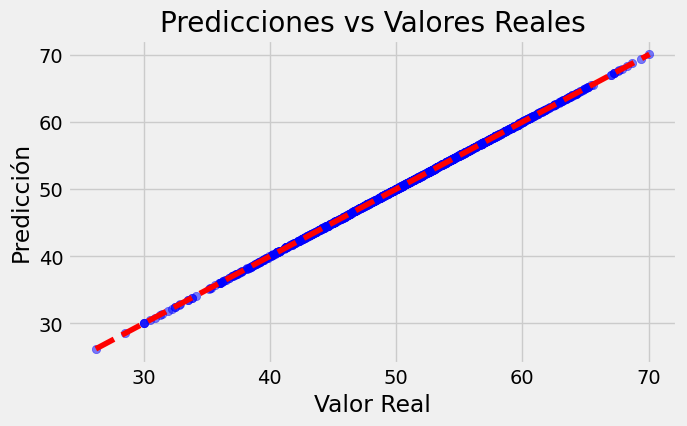

In [ ]:
import matplotlib.pyplot as plt

# Graficar las predicciones vs los valores reales
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Línea de referencia
plt.title("Predicciones vs Valores Reales")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.show()


Al parecer el modelo se esta sobreajustando, tomaremos medidas para poder encontrar una solución

#Aplicar regularización (Ridge o Lasso):


Intentaremos reducir el overfiting utilizando estas regulaciones

Ridge

In [ ]:
from sklearn.linear_model import Ridge

# Crear el modelo de regresión Ridge con un parámetro de regularización (alpha)
modelo_ridge = Ridge(alpha=1.0)

# Entrenar el modelo con los datos de entrenamiento
modelo_ridge.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_ridge = modelo_ridge.predict(X_test)

# Evaluar el modelo
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"R2 Score (Ridge): {r2_ridge}")
print(f"Mean Squared Error (Ridge): {mse_ridge}")


R2 Score (Ridge): 0.9999999999949941
Mean Squared Error (Ridge): 2.521506422141771e-10


Lasso

In [ ]:
from sklearn.linear_model import Lasso

# Crear el modelo de regresión Lasso con un parámetro de regularización (alpha)
modelo_lasso = Lasso(alpha=0.1)

# Entrenar el modelo con los datos de entrenamiento
modelo_lasso.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred_lasso = modelo_lasso.predict(X_test)

# Evaluar el modelo
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"R2 Score (Lasso): {r2_lasso}")
print(f"Mean Squared Error (Lasso): {mse_lasso}")


R2 Score (Lasso): 0.9998184685872378
Mean Squared Error (Lasso): 0.009143794218822743


No fue el resultado que esperabamos, procederemos a utilizar otro modelo

#Probando otro modelo


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_model.predict(X_test)

# Calcular R2 Score y Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"R2 Score (Random Forest): {r2_rf}")
print(f"Mean Squared Error (Random Forest): {mse_rf}")


R2 Score (Random Forest): 0.9371549158766683
Mean Squared Error (Random Forest): 3.165526605805593


Aun nos da un resultado que podria significar un sobreajuste en el modelo, probemos otro modelo

Gradient Boosting Regressor (XGBoost)

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Calcular R2 Score y Mean Squared Error
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(f"R2 Score (XGBoost): {r2_xgb}")
print(f"Mean Squared Error (XGBoost): {mse_xgb}")


R2 Score (XGBoost): 0.985502833853799
Mean Squared Error (XGBoost): 0.7302268074703084


Tuning de hiperparámetros con GridSearchCV para XGBoost
Vamos a buscar los mejores valores para algunos de los hiperparámetros más importantes, con el fin de mejorar el modelo

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Definimos el modelo base
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Definimos la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Creamos el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1
)

# Entrenamos
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluamos el mejor modelo
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2 Score (XGBoost optimizado):", r2_score(y_test, y_pred))
print("MSE (XGBoost optimizado):", mean_squared_error(y_test, y_pred))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Mejores hiperparámetros: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
R2 Score (XGBoost optimizado): 0.996174064153269
MSE (XGBoost optimizado): 0.19271358904006688


**XGBoost optimizado está capturando de forma precisa la relación entre las variables predictoras y el rendimiento del estudiante.**

**A diferencia de la regresión lineal, este modelo generaliza mejor y evita el overfitting observado anteriormente.**

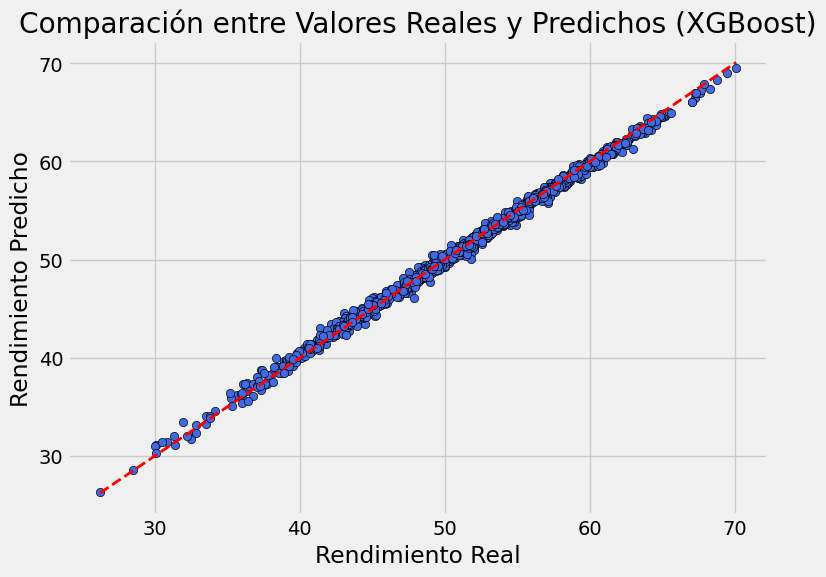

In [ ]:
# y_test: reales
# y_pred: predichos por el mejor modelo (XGBoost optimizado)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="royalblue", edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Rendimiento Real')
plt.ylabel('Rendimiento Predicho')
plt.title('Comparación entre Valores Reales y Predichos (XGBoost)')
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluación de los modelos

In [ ]:
modelo

LinearRegression()

In [ ]:
modelo_ridge

Ridge()

In [ ]:
modelo_lasso

Lasso(alpha=0.1)

In [ ]:
rf_model

RandomForestRegressor(random_state=42)

In [ ]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
best_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np
import pandas as pd

# Lista de modelos
modelos = {
    'Regresión Lineal': modelo,
    'Ridge': modelo_ridge,
    'Lasso': modelo_lasso,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'XGBoost Optimizado': best_xgb
}

# Diccionario para almacenar resultados
resultados = {
    'Modelo': [],
    'R2 Score': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE (%)': []
}

# Evaluamos cada modelo
for nombre, modelo in modelos.items():
    # Predicciones
    y_pred = modelo.predict(X_test)

    # Métricas
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # en %

    # Guardamos resultados
    resultados['Modelo'].append(nombre)
    resultados['R2 Score'].append(r2)
    resultados['MSE'].append(mse)
    resultados['RMSE'].append(rmse)
    resultados['MAE'].append(mae)
    resultados['MAPE (%)'].append(mape)


R2 Score: Proporción de la varianza explicada por el modelo.

MSE: Error cuadrático medio.

RMSE: Raíz del error cuadrático medio.

MAE: Error absoluto medio.

MAPE: Porcentaje medio de error absoluto

In [ ]:
df_resultados = pd.DataFrame(resultados).sort_values(by='R2 Score', ascending=False)
df_resultados

Modelo  R2 Score           MSE      RMSE       MAE  MAPE (%)
1               Ridge  1.000000  2.521506e-10  0.000016  0.000013  0.000025
2               Lasso  0.999818  9.143794e-03  0.095623  0.076240  0.153104
0    Regresión Lineal  0.996174  1.927136e-01  0.438992  0.337046  0.687261
5  XGBoost Optimizado  0.996174  1.927136e-01  0.438992  0.337046  0.687261
4             XGBoost  0.985503  7.302268e-01  0.854533  0.620777  1.269439
3       Random Forest  0.937155  3.165527e+00  1.779193  1.310649  2.695117

# **Guardamos el modelo entrenado**

In [ ]:
import joblib

In [ ]:
joblib.dump(best_xgb, 'modelo_entrenado_xgb.pkl')

['modelo_entrenado_xgb.pkl']

# **Interpretabilidad del Modelo**
**Técnicas de explicabilidad utilizadas (SHAP, LIME, etc.), importancia de variables, y evaluación de posibles sesgos en el modelo.**


Importancia de variables (feature importance)

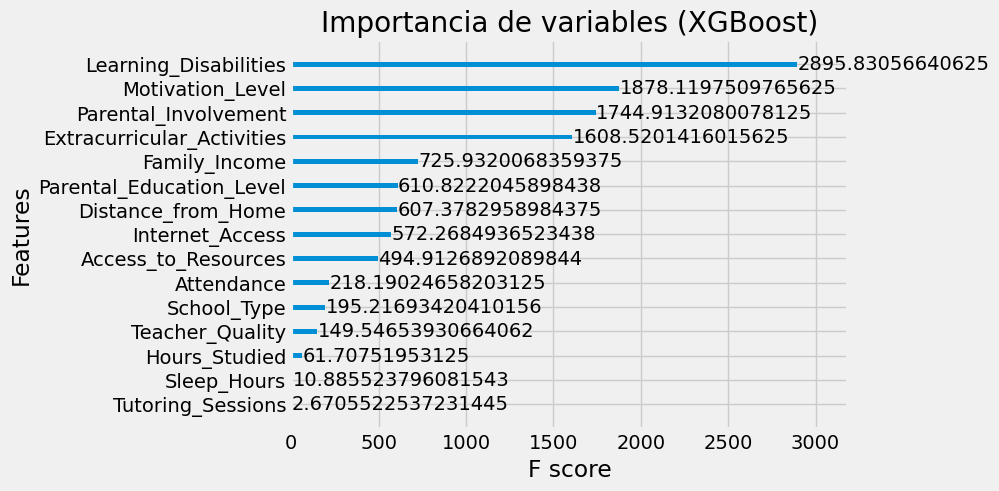

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_xgb, importance_type='gain')
plt.title("Importancia de variables (XGBoost)")
plt.show()


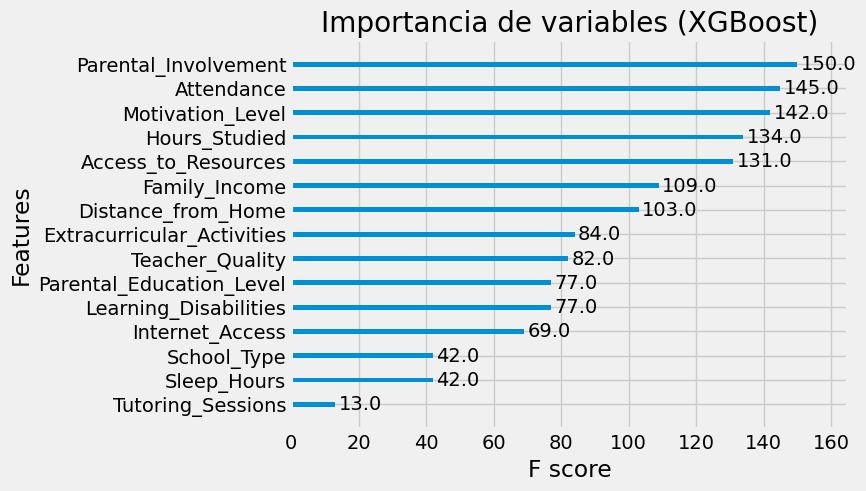

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_xgb, importance_type='weight')
plt.title("Importancia de variables (XGBoost)")
plt.show()


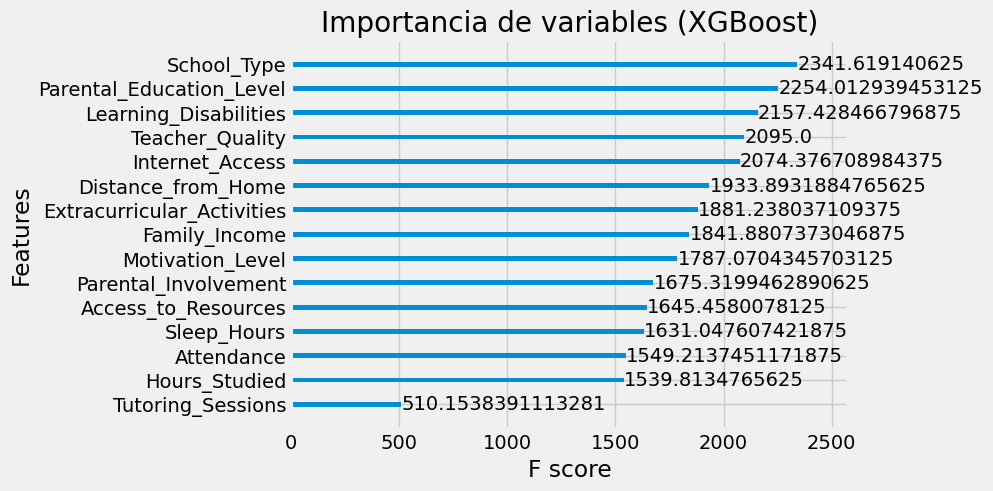

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(best_xgb, importance_type='cover')
plt.title("Importancia de variables (XGBoost)")
plt.show()

Interpretabilidad con SHAP (SHapley Additive exPlanations)

In [ ]:
pip install shap

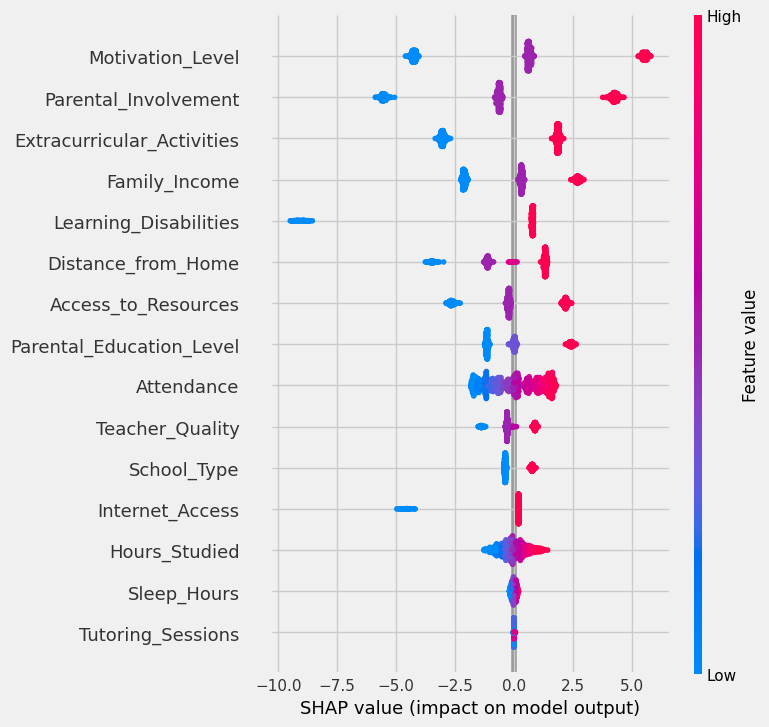

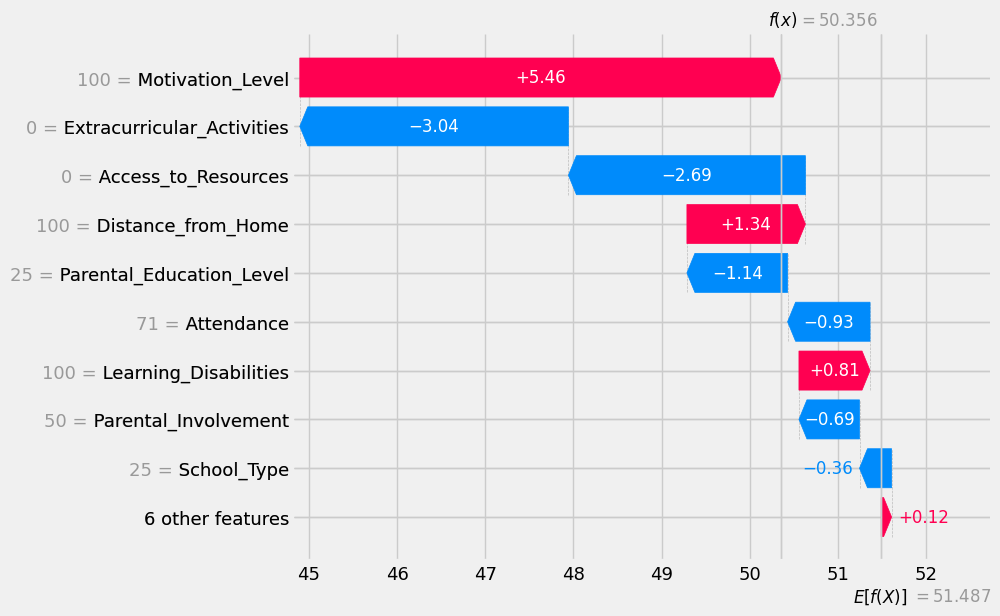

In [ ]:
import shap

# Crear el explainer para XGBoost
explainer = shap.Explainer(best_xgb, X_test)


shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

shap.plots.waterfall(shap_values[0])

Interpretabilidad con LIME (Local Interpretable Model-agnostic Explanations)

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=66773d4b7f407dd07471ff3480581b597f4f55d26ebe59a6bbed860f785ef0ba
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import numpy as np

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_test),
    feature_names=X_test.columns,
    mode='regression'
)

i = 0
exp = explainer.explain_instance(X_test.iloc[i].values, best_xgb.predict, num_features=10)
exp.show_in_notebook()

In [ ]:
df.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6607.000000  6607.000000           6607.000000          6607.000000   
mean       19.975329    79.977448             54.321175            55.009838   
std         5.990594    11.547475             34.776068            34.917346   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000             50.000000            50.000000   
50%        20.000000    80.000000             50.000000            50.000000   
75%        24.000000    90.000000            100.000000           100.000000   
max        44.000000   100.000000            100.000000           100.000000   

       Extracurricular_Activities  Sleep_Hours  Motivation_Level  \
count                 6607.000000   6607.00000       6607.000000   
mean                    59.603451      7.02906         45.323142   
std                     49.072785      1.46812         34.789895   
min                      0.000000      4.00000          0.000000   
25%                      0.000000      6.00000          0.000000   
50%                    100.000000      7.00000         50.000000   
75%                    100.000000      8.00000         50.000000   
max                    100.000000     10.00000        100.000000   

       Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
count      6607.000000        6607.000000    6607.000000      6607.000000   
mean         92.447404           1.493719      39.382473        59.868624   
std          26.425812           1.230570      37.130826        29.816433   
min           0.000000           0.000000       0.000000         0.000000   
25%         100.000000           1.000000       0.000000        50.000000   
50%         100.000000           1.000000      50.000000        50.000000   
75%         100.000000           2.000000      50.000000       100.000000   
max         100.000000           8.000000     100.000000       100.000000   

       School_Type  Learning_Disabilities  Parental_Education_Level  \
count  6607.000000            6607.000000               6607.000000   
mean     40.203572              89.480854                 47.639625   
std      23.002393              30.682319                 28.166482   
min      25.000000               0.000000                 25.000000   
25%      25.000000             100.000000                 25.000000   
50%      25.000000             100.000000                 47.000000   
75%      75.000000             100.000000                 50.000000   
max      75.000000             100.000000                100.000000   

       Distance_from_Home  Rendimiento_Esperado  
count         6607.000000           6607.000000  
mean            74.656879             50.624175  
std             33.416765              7.369761  
min              0.000000             20.775000  
25%             50.000000             45.875000  
50%            100.000000             50.875000  
75%            100.000000             55.675000  
max            100.000000             73.825000

# **Pruebas**

In [ ]:
import pandas as pd
import joblib
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# === 1. Cargar el modelo previamente entrenado ===
modelo = joblib.load('/content/drive/MyDrive/Colab Notebooks/InteligenciaArt-Principios/Proyecto/modelo_entrenado_xgb.pkl')

In [ ]:
# === 2. Leer el archivo Excel ===

archivo_excel = '/content/drive/MyDrive/Colab Notebooks/InteligenciaArt-Principios/Proyecto/DatosEstudiantesPredecir.xlsx'
df_original = pd.read_excel(archivo_excel)
# Ver las primeras filas
df_original.head(5)

Id Estudiante           Nombres     Apellidos  Horas de estudio  \
0              1            NATIVO  ABAD ALVARES                40   
1              2             JULIO  ABAD ANGELES                33   
2              3  CINTHIA ANGELICA  ABAD BALDEON                19   
3              4            LISSET    ABAD BAZAN                23   
4              5           FRANCIS    ABAD CERNA                17   

   Porcentaje Asistencias Participación de los padres Acceso a recursos  \
0                      63                       Medio              Alto   
1                      96                        Alto             Medio   
2                      90                        Bajo              Alto   
3                      94                        Alto              Bajo   
4                      61                       Medio             Medio   

  Actividades Extracurriculares  Horas de sueño Nivel de motivación  \
0                            No               4                Bajo   
1                            Si              10                Alto   
2                            Si               8                Alto   
3                            Si               9                Bajo   
4                            No               5                Alto   

  Acceso a internet  Sesiones de tutoria Ingresos familiares Calidad docente  \
0                No                    6               Medio           Medio   
1                Si                    8                Bajo            Alto   
2                No                    2               Medio            Bajo   
3                No                    7                Bajo           Medio   
4                Si                    1               Medio            Bajo   

  Tipo escuela origen Discapacidad Cognitiva   Educación parental  \
0             Privada                     No  Secundaria completa   
1             Publica                     No  Secundaria completa   
2             Privada                     No             Titulado   
3             Privada                     No  Secundaria completa   
4             Privada                     No             Titulado   

  Distancia de casa  
0             Cerca  
1             Lejos  
2             Cerca  
3             Cerca  
4             Lejos

In [ ]:
# === 3. Definir las columnas independientes que espera el modelo ===
columnas_entrada = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
    'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
    'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
    'Family_Income', 'Teacher_Quality', 'School_Type',
    'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']

In [ ]:
# === 4. Limpieza y tratamiento ===
mapeo_columnas = {
    'Horas de estudio': 'Hours_Studied',
    'Porcentaje Asistencias': 'Attendance',
    'Participación de los padres': 'Parental_Involvement',
    'Acceso a recursos': 'Access_to_Resources',
    'Actividades Extracurriculares': 'Extracurricular_Activities',
    'Horas de sueño': 'Sleep_Hours',
    'Nivel de motivación': 'Motivation_Level',
    'Acceso a internet': 'Internet_Access',
    'Sesiones de tutoria': 'Tutoring_Sessions',
    'Ingresos familiares': 'Family_Income',
    'Calidad docente': 'Teacher_Quality',
    'Tipo escuela origen': 'School_Type',
    'Discapacidad Cognitiva': 'Learning_Disabilities',
    'Educación parental': 'Parental_Education_Level',
    'Distancia de casa': 'Distance_from_Home'
}

dfPrueba = df_original.rename(columns=mapeo_columnas)

In [ ]:
columnas_eliminar = ['Id Estudiante', 'Nombres', 'Apellidos']
dfPrueba = dfPrueba.drop(columns=[col for col in columnas_eliminar if col in df_original.columns], errors='ignore')

In [ ]:
# === 5. Codificacion de columnas ===
ordinal_maps = {
    'Parental_Involvement': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Access_to_Resources': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Motivation_Level': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Extracurricular_Activities': {'No': 0, 'Si': 100},
    'Internet_Access': {'No': 0, 'Si': 100},
    'Family_Income': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Teacher_Quality': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'School_Type': {'Publica': 25, 'Privada': 75},
    'Learning_Disabilities': {'No': 100, 'Si': 0},
    'Parental_Education_Level': {'Secundaria completa': 25, 'Bachiller': 50, 'Titulado': 100},
    'Distance_from_Home': {'Lejos': 0, 'Moderado': 50, 'Cerca': 100}
}


for col, mapping in ordinal_maps.items():
    dfPrueba[col] = dfPrueba[col].map(mapping)

In [ ]:
# === 6. Verificar que el archivo tenga las columnas necesarias ===
if not all(col in dfPrueba.columns for col in columnas_entrada):
    raise ValueError("El archivo no contiene todas las columnas requeridas.")

In [ ]:
# === 7. Hacer la predicción ===
predicciones = modelo.predict(dfPrueba[columnas_entrada])

In [ ]:
# === 8. Agregar la predicción como nueva columna al DataFrame ===
df_original['Rendimiento_Predicho'] = predicciones

In [ ]:
# === 9. Mostrar resultados ===
print(df_original[['Id Estudiante', 'Nombres', 'Apellidos', 'Rendimiento_Predicho']].head())

   Id Estudiante           Nombres     Apellidos  Rendimiento_Predicho
0              1            NATIVO  ABAD ALVARES             42.679058
1              2             JULIO  ABAD ANGELES             61.213596
2              3  CINTHIA ANGELICA  ABAD BALDEON             56.643829
3              4            LISSET    ABAD BAZAN             47.774124
4              5           FRANCIS    ABAD CERNA             50.283829


Crearemos una funcion que realizara los pasos anterior mencionados:

In [ ]:
def predecir_rendimiento(archivo_excel_df):
  modelo = joblib.load('/content/drive/MyDrive/Colab Notebooks/InteligenciaArt-Principios/Proyecto/modelo_entrenado_xgb.pkl')
  columnas_entrada = ['Hours_Studied', 'Attendance', 'Parental_Involvement',
    'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
    'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions',
    'Family_Income', 'Teacher_Quality', 'School_Type',
    'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home']

  mapeo_columnas = {
    'Horas de estudio': 'Hours_Studied',
    'Porcentaje Asistencias': 'Attendance',
    'Participación de los padres': 'Parental_Involvement',
    'Acceso a recursos': 'Access_to_Resources',
    'Actividades Extracurriculares': 'Extracurricular_Activities',
    'Horas de sueño': 'Sleep_Hours',
    'Nivel de motivación': 'Motivation_Level',
    'Acceso a internet': 'Internet_Access',
    'Sesiones de tutoria': 'Tutoring_Sessions',
    'Ingresos familiares': 'Family_Income',
    'Calidad docente': 'Teacher_Quality',
    'Tipo escuela origen': 'School_Type',
    'Discapacidad Cognitiva': 'Learning_Disabilities',
    'Educación parental': 'Parental_Education_Level',
    'Distancia de casa': 'Distance_from_Home'
    }
  df_original = archivo_excel_df.copy()
  archivo_excel_df = df_original.rename(columns=mapeo_columnas)

  columnas_eliminar = ['Id Estudiante', 'Nombres', 'Apellidos']
  archivo_excel_df = archivo_excel_df.drop(columns=[col for col in columnas_eliminar if col in archivo_excel_df.columns], errors='ignore')

  ordinal_maps = {
    'Parental_Involvement': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Access_to_Resources': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Motivation_Level': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Extracurricular_Activities': {'No': 0, 'Si': 100},
    'Internet_Access': {'No': 0, 'Si': 100},
    'Family_Income': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'Teacher_Quality': {'Bajo': 0, 'Medio': 50, 'Alto': 100},
    'School_Type': {'Publica': 25, 'Privada': 75},
    'Learning_Disabilities': {'No': 100, 'Si': 0},
    'Parental_Education_Level': {'Secundaria completa': 25, 'Bachiller': 50, 'Titulado': 100},
    'Distance_from_Home': {'Lejos': 0, 'Moderado': 50, 'Cerca': 100}}

  for col, mapping in ordinal_maps.items():
      archivo_excel_df[col] = archivo_excel_df[col].map(mapping)

  if not all(col in archivo_excel_df.columns for col in columnas_entrada):
      raise ValueError("El archivo no contiene todas las columnas requeridas.")

  predicciones = modelo.predict(archivo_excel_df[columnas_entrada])

  df_original['Rendimiento_Predicho'] = predicciones

  print(df_original[['Id Estudiante', 'Nombres', 'Apellidos', 'Rendimiento_Predicho']].head())



# **Demostracion de uso :**

In [ ]:
import pandas as pd
from IPython.display import display
import io


from tkinter.filedialog import askopenfilename

from google.colab import files
uploaded = files.upload()
# Cargar el archivo Excel
for filename in uploaded.keys():
  if filename.endswith('.xlsx') or filename.endswith('.xls'):
      df = pd.read_excel(io.BytesIO(uploaded[filename]))
      print("Archivo cargado correctamente:")
      display(predecir_rendimiento(df))
  else:
    print("Por favor, sube un archivo Excel (.xlsx o .xls)")


Saving DatosEstudiantesPredecir.xlsx to DatosEstudiantesPredecir (6).xlsx
Archivo cargado correctamente:
   Id Estudiante           Nombres     Apellidos  Rendimiento_Predicho
0              1            NATIVO  ABAD ALVARES             42.679058
1              2             JULIO  ABAD ANGELES             61.213596
2              3  CINTHIA ANGELICA  ABAD BALDEON             56.643829
3              4            LISSET    ABAD BAZAN             47.774124
4              5           FRANCIS    ABAD CERNA             50.283829


None